<a href="https://colab.research.google.com/github/MohamadRayi/MachineLearningTasks/blob/main/Task_Lecture_11_LeNet_Mohamad_Rayi_Dwi_Putra_1103213070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mohamad Rayi Dwi Putra

1103213070

Task Lecture 11 LeNet

Dataset MNIST

Dokumentasi Prompt Chatgpt:

https://chatgpt.com/share/98bfc4c0-1bc2-42a8-b698-54eef1e396d3

LeNet adalah salah satu arsitektur jaringan saraf konvolusional (CNN) yang pertama kali diperkenalkan oleh Yann LeCun dan timnya pada akhir 1980-an dan awal 1990-an. LeNet terutama digunakan untuk pengenalan tulisan tangan pada data MNIST. Model ini terdiri dari beberapa lapisan konvolusi dan lapisan pooling yang diikuti oleh lapisan fully connected.

Berikut adalah langkah-langkah untuk membangun dan melatih model LeNet menggunakan Google Colab:

**Mengimpor Library yang Dibutuhkan**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


**Memuat dan Mempersiapkan Data MNIST**

In [ ]:
# Memuat dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalisasi gambar ke nilai [0, 1]
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


11490434/11490434 [==============================] - 0s 0us/step


**Membangun Model LeNet**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

**Kompilasi dan Latih Model**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 39s 19ms/step - loss: 0.2472 - accuracy: 0.9235 - val_loss: 0.0843 - val_accuracy: 0.9729
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0775 - accuracy: 0.9764 - val_loss: 0.0615 - val_accuracy: 0.9807
Epoch 3/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0551 - accuracy: 0.9826 - val_loss: 0.0463 - val_accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0431 - accuracy: 0.9867 - val_loss: 0.0366 - val_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0358 - val_accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0368 - val_accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0401 -

**Evaluasi Model**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 2s - loss: 0.0397 - accuracy: 0.9893 - 2s/epoch - 6ms/step

Test accuracy: 0.989300012588501


Visualisasi Hasil Latihan

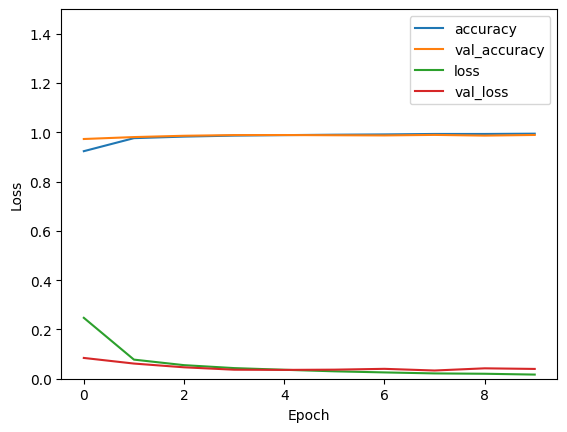

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1.5])
plt.legend(loc='upper right')
plt.show()
